In [11]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import os
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter('ignore')
import numpy as np


In [12]:
housing_training_data = pd.read_csv("housing_training_data.csv")
housing_training_data.head()

,house_id,price,beds,baths,square_feet,lot_size,hoa_permonth,Summer Temp,Winter Temp,population
0,1,369900.0,5.0,3.0,2500.0,404672.0,0.0,61.0,19.0,1930.0
1,2,319000.0,2.0,2.0,1456.0,125452.0,0.0,61.0,19.0,1930.0
2,3,115000.0,2.0,1.0,896.0,86248.0,0.0,61.0,19.0,1930.0
3,4,205000.0,3.0,1.0,1423.0,78408.0,0.0,61.0,19.0,1930.0
4,5,299000.0,2.0,2.0,2185.0,78843.0,0.0,61.0,19.0,1930.0


In [13]:
X = housing_training_data[['price', "beds", 'baths', "square_feet", "lot_size", 'hoa_permonth', "Summer Temp", "Winter Temp", "population"
                          ]]
print(X.shape)

(10027, 9)


In [14]:
data = X.copy()

# data_binary_encoded = pd.get_dummies(data)
# data_binary_encoded.head()

In [15]:
from sklearn.model_selection import train_test_split

# X = pd.get_dummies(X)

X_train, X_test= train_test_split(X, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_train.head()

,price,beds,baths,square_feet,lot_size,hoa_permonth,Summer Temp,Winter Temp,population
3827,2348888.0,4.0,2.0,2420.0,2604.0,0.0,67.2,54.0,805235.0
9498,369900.0,2.0,1.0,831.0,7500.0,440.0,69.1,45.0,608660.0
1506,368330.0,5.0,3.5,2898.0,10890.0,54.0,89.0,28.0,5281.0
7684,400000.0,0.0,0.0,3290.0,14810.0,0.0,94.3,50.3,583756.0
3288,824900.0,3.0,2.5,1661.0,10288.0,0.0,76.0,49.0,1307402.0


In [16]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)
# y_scaler = StandardScaler().fit(y_train)

In [17]:
X_train_scaled = X_scaler.transform(X)
# X_test_scaled = X_scaler.transform(X_test)
# # y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)

In [18]:
# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Data")
# axes2.set_title("Scaled Data")

# maxx = X_train["square_feet"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["size"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [19]:
# # Plot the results 
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")
# plt.show()

In [20]:
# from sklearn.metrics import mean_squared_error

# predictions = model.predict(X_test_scaled)
# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)

# print(f"MSE: {MSE}, R2: {r2}")

In [21]:
kmeans = KMeans(n_clusters=16)

In [22]:
kmeans.fit(X)


KMeans(n_clusters=16)

In [23]:
predicted_clusters = kmeans.predict(X)

In [24]:
X

,price,beds,baths,square_feet,lot_size,hoa_permonth,Summer Temp,Winter Temp,population
0,369900.0,5.0,3.00,2500.0,404672.0,0.0,61.0,19.0,1930.0
1,319000.0,2.0,2.00,1456.0,125452.0,0.0,61.0,19.0,1930.0
2,115000.0,2.0,1.00,896.0,86248.0,0.0,61.0,19.0,1930.0
3,205000.0,3.0,1.00,1423.0,78408.0,0.0,61.0,19.0,1930.0
4,299000.0,2.0,2.00,2185.0,78843.0,0.0,61.0,19.0,1930.0
...,...,...,...,...,...,...,...,...,...
10022,515000.0,2.0,2.25,1420.0,1245.0,190.0,69.1,45.0,608660.0
10023,599000.0,3.0,1.00,1020.0,6135.0,0.0,69.1,45.0,53007.0
10024,599000.0,3.0,1.00,1020.0,6135.0,0.0,69.1,45.0,53007.0
10025,365000.0,3.0,2.00,1324.0,0.0,237.0,79.0,33.0,161791.0


In [25]:
Xlist = X.to_numpy()

In [26]:
Xlist

array([[3.69900e+05, 5.00000e+00, 3.00000e+00, ..., 6.10000e+01,
        1.90000e+01, 1.93000e+03],
       [3.19000e+05, 2.00000e+00, 2.00000e+00, ..., 6.10000e+01,
        1.90000e+01, 1.93000e+03],
       [1.15000e+05, 2.00000e+00, 1.00000e+00, ..., 6.10000e+01,
        1.90000e+01, 1.93000e+03],
       ...,
       [5.99000e+05, 3.00000e+00, 1.00000e+00, ..., 6.91000e+01,
        4.50000e+01, 5.30070e+04],
       [3.65000e+05, 3.00000e+00, 2.00000e+00, ..., 7.90000e+01,
        3.30000e+01, 1.61791e+05],
       [3.65000e+05, 3.00000e+00, 2.00000e+00, ..., 7.90000e+01,
        3.30000e+01, 1.61791e+05]])

### HERE BEGINS THE MAGIC

In [27]:
kmeans.fit(Xlist)

predicted_clusters = kmeans.predict(Xlist)
#TESTING INFO INPUT BLAH BLAH
# predicted_clusters = [this is where we put the array of inputed data]

In [28]:
predicted_clusters

array([ 7,  7,  7, ..., 15,  7,  7], dtype=int32)

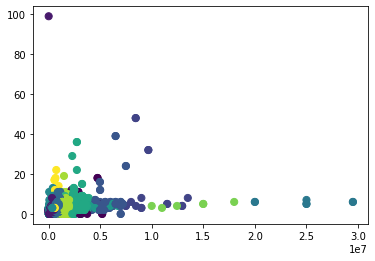

In [29]:
# Plot the clusters
plt.scatter(Xlist[:, 0], Xlist[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [30]:
# Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [31]:
centers

array([[ 3.19921847e+06,  4.60273973e+00,  4.58219178e+00,
         3.07389041e+03,  1.32700274e+04,  2.39287671e+02,
         7.84726027e+01,  4.82273973e+01,  3.60281510e+06],
       [ 3.81000823e+05,  2.20102136e+00,  1.79201486e+00,
         1.24583240e+03,  3.33349118e+03,  2.59326834e+02,
         8.48337512e+01,  4.71253482e+01,  5.48709759e+05],
       [ 2.49900000e+06,  4.00000000e+00,  4.00000000e+00,
         5.09800000e+03,  3.57192000e+07,  0.00000000e+00,
         8.34500000e+01,  3.02000000e+01,  2.05671000e+05],
       [ 9.81968750e+06,  1.36250000e+01,  1.40937500e+01,
         1.22402500e+04,  3.89322500e+04,  7.66125000e+02,
         7.80250000e+01,  4.50937500e+01,  1.35358525e+06],
       [ 5.45158717e+06,  6.06410256e+00,  4.41025641e+00,
         5.70673077e+03,  1.70144103e+04,  6.25653846e+02,
         7.40461538e+01,  4.96179487e+01,  6.08657949e+05],
       [ 8.13504209e+05,  2.74391989e+00,  2.18687411e+00,
         1.73655722e+03,  5.03014378e+03,  3.737224

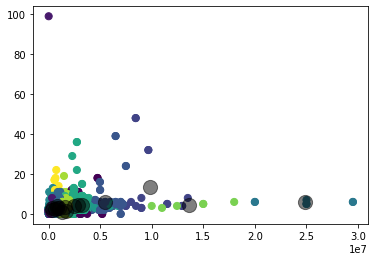

In [32]:
plt.scatter(Xlist[:, 0], Xlist[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

In [33]:
cat = kmeans.predict(Xlist[0].reshape(1, -1))

In [34]:
Xlist[0]

array([3.69900e+05, 5.00000e+00, 3.00000e+00, 2.50000e+03, 4.04672e+05,
       0.00000e+00, 6.10000e+01, 1.90000e+01, 1.93000e+03])

In [35]:
Xlist[1]

array([3.19000e+05, 2.00000e+00, 2.00000e+00, 1.45600e+03, 1.25452e+05,
       0.00000e+00, 6.10000e+01, 1.90000e+01, 1.93000e+03])

In [36]:
X

,price,beds,baths,square_feet,lot_size,hoa_permonth,Summer Temp,Winter Temp,population
0,369900.0,5.0,3.00,2500.0,404672.0,0.0,61.0,19.0,1930.0
1,319000.0,2.0,2.00,1456.0,125452.0,0.0,61.0,19.0,1930.0
2,115000.0,2.0,1.00,896.0,86248.0,0.0,61.0,19.0,1930.0
3,205000.0,3.0,1.00,1423.0,78408.0,0.0,61.0,19.0,1930.0
4,299000.0,2.0,2.00,2185.0,78843.0,0.0,61.0,19.0,1930.0
...,...,...,...,...,...,...,...,...,...
10022,515000.0,2.0,2.25,1420.0,1245.0,190.0,69.1,45.0,608660.0
10023,599000.0,3.0,1.00,1020.0,6135.0,0.0,69.1,45.0,53007.0
10024,599000.0,3.0,1.00,1020.0,6135.0,0.0,69.1,45.0,53007.0
10025,365000.0,3.0,2.00,1324.0,0.0,237.0,79.0,33.0,161791.0


In [37]:
house_list = []

for i in range(4000):
    if kmeans.predict(Xlist[i].reshape(1, -1)) == cat:
        print (housing_training_data.iloc[i])
        print (housing_training_data.house_id[i])
        house_list.append(housing_training_data.house_id[i])
        print (Xlist[i])
        print (kmeans.predict(Xlist[i].reshape(1, -1)))
        
    

house_id             1.0
price           369900.0
beds                 5.0
baths                3.0
square_feet       2500.0
lot_size        404672.0
hoa_permonth         0.0
Summer Temp         61.0
Winter Temp         19.0
population        1930.0
Name: 0, dtype: float64
1
[3.69900e+05 5.00000e+00 3.00000e+00 2.50000e+03 4.04672e+05 0.00000e+00
 6.10000e+01 1.90000e+01 1.93000e+03]
[7]
house_id             2.0
price           319000.0
beds                 2.0
baths                2.0
square_feet       1456.0
lot_size        125452.0
hoa_permonth         0.0
Summer Temp         61.0
Winter Temp         19.0
population        1930.0
Name: 1, dtype: float64
2
[3.19000e+05 2.00000e+00 2.00000e+00 1.45600e+03 1.25452e+05 0.00000e+00
 6.10000e+01 1.90000e+01 1.93000e+03]
[7]
house_id             3.0
price           115000.0
beds                 2.0
baths                1.0
square_feet        896.0
lot_size         86248.0
hoa_permonth         0.0
Summer Temp         61.0
Winter Temp       

[7]
house_id            41.0
price           360000.0
beds                 4.0
baths                2.0
square_feet       2152.0
lot_size          7000.0
hoa_permonth         0.0
Summer Temp         62.7
Winter Temp         20.4
population      291826.0
Name: 40, dtype: float64
41
[3.60000e+05 4.00000e+00 2.00000e+00 2.15200e+03 7.00000e+03 0.00000e+00
 6.27000e+01 2.04000e+01 2.91826e+05]
[7]
house_id            42.0
price           249900.0
beds                 3.0
baths                1.0
square_feet       1184.0
lot_size          6940.0
hoa_permonth         0.0
Summer Temp         62.7
Winter Temp         20.4
population      291826.0
Name: 41, dtype: float64
42
[2.49900e+05 3.00000e+00 1.00000e+00 1.18400e+03 6.94000e+03 0.00000e+00
 6.27000e+01 2.04000e+01 2.91826e+05]
[7]
house_id            43.0
price           529900.0
beds                 4.0
baths                3.0
square_feet       3490.0
lot_size          9320.0
hoa_permonth         0.0
Summer Temp         62.7
Winter Tem

house_id            71.0
price           368900.0
beds                 3.0
baths                3.0
square_feet       2075.0
lot_size          9480.0
hoa_permonth         0.0
Summer Temp         62.7
Winter Temp         20.4
population      291826.0
Name: 70, dtype: float64
71
[3.68900e+05 3.00000e+00 3.00000e+00 2.07500e+03 9.48000e+03 0.00000e+00
 6.27000e+01 2.04000e+01 2.91826e+05]
[7]
house_id            72.0
price           399000.0
beds                 4.0
baths                2.0
square_feet       1878.0
lot_size          7060.0
hoa_permonth         0.0
Summer Temp         62.7
Winter Temp         20.4
population      291826.0
Name: 71, dtype: float64
72
[3.99000e+05 4.00000e+00 2.00000e+00 1.87800e+03 7.06000e+03 0.00000e+00
 6.27000e+01 2.04000e+01 2.91826e+05]
[7]
house_id            73.0
price           550000.0
beds                 8.0
baths                4.0
square_feet       3248.0
lot_size         10548.0
hoa_permonth         0.0
Summer Temp         62.7
Winter Temp   

house_id           105.0
price           385000.0
beds                 8.0
baths                7.0
square_feet       3060.0
lot_size          6750.0
hoa_permonth         0.0
Summer Temp         62.7
Winter Temp         20.4
population      291826.0
Name: 104, dtype: float64
105
[3.85000e+05 8.00000e+00 7.00000e+00 3.06000e+03 6.75000e+03 0.00000e+00
 6.27000e+01 2.04000e+01 2.91826e+05]
[7]
house_id           107.0
price           300000.0
beds                 6.0
baths                6.0
square_feet       1490.0
lot_size         14000.0
hoa_permonth         0.0
Summer Temp         62.7
Winter Temp         20.4
population      291826.0
Name: 106, dtype: float64
107
[3.00000e+05 6.00000e+00 6.00000e+00 1.49000e+03 1.40000e+04 0.00000e+00
 6.27000e+01 2.04000e+01 2.91826e+05]
[7]
house_id           109.0
price           499900.0
beds                 8.0
baths                4.0
square_feet       3500.0
lot_size          7000.0
hoa_permonth         0.0
Summer Temp         62.7
Winter Tem

Name: 141, dtype: float64
142
[2.05000e+05 3.00000e+00 2.00000e+00 1.02000e+03 0.00000e+00 1.60000e+02
 6.27000e+01 2.04000e+01 2.91826e+05]
[7]
house_id           143.0
price           237500.0
beds                 3.0
baths                2.0
square_feet       1361.0
lot_size             0.0
hoa_permonth       168.0
Summer Temp         62.7
Winter Temp         20.4
population      291826.0
Name: 142, dtype: float64
143
[2.37500e+05 3.00000e+00 2.00000e+00 1.36100e+03 0.00000e+00 1.68000e+02
 6.27000e+01 2.04000e+01 2.91826e+05]
[7]
house_id           144.0
price            95000.0
beds                 2.0
baths                1.0
square_feet        824.0
lot_size             0.0
hoa_permonth       177.0
Summer Temp         62.7
Winter Temp         20.4
population      291826.0
Name: 143, dtype: float64
144
[9.50000e+04 2.00000e+00 1.00000e+00 8.24000e+02 0.00000e+00 1.77000e+02
 6.27000e+01 2.04000e+01 2.91826e+05]
[7]
house_id           145.0
price           208000.0
beds           

[7]
house_id           181.0
price           189500.0
beds                 3.0
baths                2.0
square_feet       1225.0
lot_size             0.0
hoa_permonth       335.0
Summer Temp         62.7
Winter Temp         20.4
population      291826.0
Name: 180, dtype: float64
181
[1.89500e+05 3.00000e+00 2.00000e+00 1.22500e+03 0.00000e+00 3.35000e+02
 6.27000e+01 2.04000e+01 2.91826e+05]
[7]
house_id           182.0
price           120000.0
beds                 2.0
baths                1.0
square_feet        827.0
lot_size             0.0
hoa_permonth       338.0
Summer Temp         62.7
Winter Temp         20.4
population      291826.0
Name: 181, dtype: float64
182
[1.20000e+05 2.00000e+00 1.00000e+00 8.27000e+02 0.00000e+00 3.38000e+02
 6.27000e+01 2.04000e+01 2.91826e+05]
[7]
house_id           183.0
price            92000.0
beds                 2.0
baths                1.0
square_feet        829.0
lot_size             0.0
hoa_permonth       341.0
Summer Temp         62.7
Winter

[4.5000e+04 0.0000e+00 0.0000e+00 0.0000e+00 5.8806e+04 0.0000e+00
 6.8000e+01 7.0000e+00 3.3500e+03]
[7]
house_id           218.0
price           319000.0
beds                 3.0
baths                2.0
square_feet       2174.0
lot_size         23086.0
hoa_permonth        65.0
Summer Temp         68.0
Winter Temp          7.0
population        3350.0
Name: 217, dtype: float64
218
[3.1900e+05 3.0000e+00 2.0000e+00 2.1740e+03 2.3086e+04 6.5000e+01
 6.8000e+01 7.0000e+00 3.3500e+03]
[7]
house_id           219.0
price           449500.0
beds                 3.0
baths                2.0
square_feet       1854.0
lot_size         49717.0
hoa_permonth         0.0
Summer Temp         62.7
Winter Temp         20.4
population        9181.0
Name: 218, dtype: float64
219
[4.4950e+05 3.0000e+00 2.0000e+00 1.8540e+03 4.9717e+04 0.0000e+00
 6.2700e+01 2.0400e+01 9.1810e+03]
[7]
house_id           220.0
price           475000.0
beds                 3.0
baths                3.0
square_feet       2871

Name: 257, dtype: float64
258
[2.3990e+05 3.0000e+00 2.0000e+00 1.5110e+03 3.0500e+03 0.0000e+00
 6.2700e+01 2.0400e+01 2.8308e+04]
[7]
house_id           259.0
price           439000.0
beds                 4.0
baths                2.0
square_feet       2132.0
lot_size         23972.0
hoa_permonth         0.0
Summer Temp         62.7
Winter Temp         20.4
population       28308.0
Name: 258, dtype: float64
259
[4.3900e+05 4.0000e+00 2.0000e+00 2.1320e+03 2.3972e+04 0.0000e+00
 6.2700e+01 2.0400e+01 2.8308e+04]
[7]
house_id           260.0
price           435000.0
beds                 4.0
baths                3.0
square_feet       2262.0
lot_size          6812.0
hoa_permonth         0.0
Summer Temp         62.7
Winter Temp         20.4
population       28308.0
Name: 259, dtype: float64
260
[4.3500e+05 4.0000e+00 3.0000e+00 2.2620e+03 6.8120e+03 0.0000e+00
 6.2700e+01 2.0400e+01 2.8308e+04]
[7]
house_id           261.0
price           315000.0
beds                 4.0
baths            

house_id           282.0
price           167000.0
beds                 2.0
baths                2.0
square_feet        989.0
lot_size             0.0
hoa_permonth       285.0
Summer Temp         62.7
Winter Temp         20.4
population       28308.0
Name: 281, dtype: float64
282
[1.6700e+05 2.0000e+00 2.0000e+00 9.8900e+02 0.0000e+00 2.8500e+02
 6.2700e+01 2.0400e+01 2.8308e+04]
[7]
house_id           283.0
price           335000.0
beds                 3.0
baths                3.0
square_feet       1572.0
lot_size             0.0
hoa_permonth       290.0
Summer Temp         62.7
Winter Temp         20.4
population       28308.0
Name: 282, dtype: float64
283
[3.3500e+05 3.0000e+00 3.0000e+00 1.5720e+03 0.0000e+00 2.9000e+02
 6.2700e+01 2.0400e+01 2.8308e+04]
[7]
house_id           284.0
price           315000.0
beds                 2.0
baths                3.0
square_feet       1615.0
lot_size             0.0
hoa_permonth       320.0
Summer Temp         62.7
Winter Temp         20.4
pop

Name: 321, dtype: float64
322
[ 1.2500e+05  5.0000e+00  6.0000e+00  2.8800e+03  5.0000e+03  0.0000e+00
  5.5600e+01 -6.7000e+00  3.1535e+04]
[7]
house_id           323.0
price           344900.0
beds                 3.0
baths                2.0
square_feet       1639.0
lot_size          8180.0
hoa_permonth         0.0
Summer Temp         55.6
Winter Temp         -6.7
population       31535.0
Name: 322, dtype: float64
323
[ 3.4490e+05  3.0000e+00  2.0000e+00  1.6390e+03  8.1800e+03  0.0000e+00
  5.5600e+01 -6.7000e+00  3.1535e+04]
[7]
house_id           324.0
price           450435.0
beds                 4.0
baths                3.0
square_feet       2456.0
lot_size         83243.0
hoa_permonth         0.0
Summer Temp         55.6
Winter Temp         -6.7
population       31535.0
Name: 323, dtype: float64
324
[ 4.50435e+05  4.00000e+00  3.00000e+00  2.45600e+03  8.32430e+04
  0.00000e+00  5.56000e+01 -6.70000e+00  3.15350e+04]
[7]
house_id           325.0
price           434900.0
beds  

[7]
house_id           364.0
price           310000.0
beds                 1.0
baths                0.0
square_feet        612.0
lot_size        316245.0
hoa_permonth         0.0
Summer Temp         61.0
Winter Temp         19.0
population        5003.0
Name: 363, dtype: float64
364
[3.10000e+05 1.00000e+00 0.00000e+00 6.12000e+02 3.16245e+05 0.00000e+00
 6.10000e+01 1.90000e+01 5.00300e+03]
[7]
house_id           366.0
price           199000.0
beds                 1.0
baths                1.0
square_feet        738.0
lot_size         91476.0
hoa_permonth         0.0
Summer Temp         61.0
Winter Temp         19.0
population        5003.0
Name: 365, dtype: float64
366
[1.9900e+05 1.0000e+00 1.0000e+00 7.3800e+02 9.1476e+04 0.0000e+00
 6.1000e+01 1.9000e+01 5.0030e+03]
[7]
house_id           367.0
price           260000.0
beds                 3.0
baths                3.0
square_feet       1720.0
lot_size         39639.0
hoa_permonth         0.0
Summer Temp         61.0
Winter Temp    

[7]
house_id           417.0
price           239000.0
beds                 3.0
baths                3.0
square_feet       1658.0
lot_size         20473.0
hoa_permonth       120.0
Summer Temp         61.0
Winter Temp         19.0
population        5003.0
Name: 416, dtype: float64
417
[2.3900e+05 3.0000e+00 3.0000e+00 1.6580e+03 2.0473e+04 1.2000e+02
 6.1000e+01 1.9000e+01 5.0030e+03]
[7]
house_id           418.0
price           210000.0
beds                 2.0
baths                2.0
square_feet       1144.0
lot_size         20473.0
hoa_permonth       140.0
Summer Temp         61.0
Winter Temp         19.0
population        5003.0
Name: 417, dtype: float64
418
[2.1000e+05 2.0000e+00 2.0000e+00 1.1440e+03 2.0473e+04 1.4000e+02
 6.1000e+01 1.9000e+01 5.0030e+03]
[7]
house_id           420.0
price           120000.0
beds                 2.0
baths                2.0
square_feet        788.0
lot_size         87272.0
hoa_permonth         0.0
Summer Temp         68.0
Winter Temp          7.0

 6.1000e+01 7.0000e+00 5.4900e+02]
[7]
house_id           447.0
price           299000.0
beds                 3.0
baths                2.0
square_feet       2480.0
lot_size        217800.0
hoa_permonth         0.0
Summer Temp         61.0
Winter Temp          7.0
population         549.0
Name: 446, dtype: float64
447
[2.990e+05 3.000e+00 2.000e+00 2.480e+03 2.178e+05 0.000e+00 6.100e+01
 7.000e+00 5.490e+02]
[7]
house_id           449.0
price           549000.0
beds                 3.0
baths                4.0
square_feet       3840.0
lot_size        200376.0
hoa_permonth         0.0
Summer Temp         61.0
Winter Temp          7.0
population         549.0
Name: 448, dtype: float64
449
[5.49000e+05 3.00000e+00 4.00000e+00 3.84000e+03 2.00376e+05 0.00000e+00
 6.10000e+01 7.00000e+00 5.49000e+02]
[7]
house_id           450.0
price           199000.0
beds                 4.0
baths                2.0
square_feet       1344.0
lot_size         23958.0
hoa_permonth         0.0
Summer Temp   

[7]
house_id           498.0
price           199900.0
beds                 3.0
baths                2.0
square_feet       1455.0
lot_size         18730.0
hoa_permonth         0.0
Summer Temp         64.0
Winter Temp          8.0
population        7100.0
Name: 497, dtype: float64
498
[1.999e+05 3.000e+00 2.000e+00 1.455e+03 1.873e+04 0.000e+00 6.400e+01
 8.000e+00 7.100e+03]
[7]
house_id           499.0
price           315000.0
beds                 2.0
baths                2.0
square_feet       1344.0
lot_size         40075.0
hoa_permonth        13.0
Summer Temp         64.0
Winter Temp          8.0
population        7100.0
Name: 498, dtype: float64
499
[3.1500e+05 2.0000e+00 2.0000e+00 1.3440e+03 4.0075e+04 1.3000e+01
 6.4000e+01 8.0000e+00 7.1000e+03]
[7]
house_id           500.0
price           339900.0
beds                 4.0
baths                3.0
square_feet       2050.0
lot_size          9147.0
hoa_permonth        58.0
Summer Temp         64.0
Winter Temp          8.0
populati

Name: 542, dtype: float64
543
[1.329e+05 5.000e+00 2.000e+00 2.240e+03 1.481e+04 0.000e+00 6.400e+01
 8.000e+00 4.493e+03]
[7]
house_id           545.0
price           409000.0
beds                 3.0
baths                3.0
square_feet       2254.0
lot_size        193842.0
hoa_permonth         0.0
Summer Temp         64.0
Winter Temp          8.0
population        4493.0
Name: 544, dtype: float64
545
[4.09000e+05 3.00000e+00 3.00000e+00 2.25400e+03 1.93842e+05 0.00000e+00
 6.40000e+01 8.00000e+00 4.49300e+03]
[7]
house_id           546.0
price           225000.0
beds                 3.0
baths                2.0
square_feet       1904.0
lot_size         85377.0
hoa_permonth         0.0
Summer Temp         61.0
Winter Temp         19.0
population         318.0
Name: 545, dtype: float64
546
[2.2500e+05 3.0000e+00 2.0000e+00 1.9040e+03 8.5377e+04 0.0000e+00
 6.1000e+01 1.9000e+01 3.1800e+02]
[7]
house_id           547.0
price           310000.0
beds                 3.0
baths            

[7]
house_id          592.0
price           69900.0
beds                2.0
baths               1.0
square_feet      1463.0
lot_size        43560.0
hoa_permonth        0.0
Summer Temp        55.6
Winter Temp        -6.7
population       2117.0
Name: 591, dtype: float64
592
[ 6.990e+04  2.000e+00  1.000e+00  1.463e+03  4.356e+04  0.000e+00
  5.560e+01 -6.700e+00  2.117e+03]
[7]
house_id           593.0
price           416000.0
beds                 3.0
baths                3.0
square_feet       2132.0
lot_size         22630.0
hoa_permonth         0.0
Summer Temp         55.6
Winter Temp         -6.7
population        2117.0
Name: 592, dtype: float64
593
[ 4.160e+05  3.000e+00  3.000e+00  2.132e+03  2.263e+04  0.000e+00
  5.560e+01 -6.700e+00  2.117e+03]
[7]
house_id           594.0
price           247500.0
beds                 3.0
baths                2.0
square_feet       1110.0
lot_size         68694.0
hoa_permonth         0.0
Summer Temp         55.6
Winter Temp         -6.7
populatio

Name: 638, dtype: float64
639
[2.7690e+05 4.0000e+00 3.0000e+00 2.0720e+03 1.2632e+04 0.0000e+00
 6.5000e+01 1.2000e+01 5.9370e+03]
[7]
house_id           640.0
price           289000.0
beds                 3.0
baths                2.0
square_feet       1593.0
lot_size         41817.0
hoa_permonth         0.0
Summer Temp         65.0
Winter Temp         12.0
population        5937.0
Name: 639, dtype: float64
640
[2.8900e+05 3.0000e+00 2.0000e+00 1.5930e+03 4.1817e+04 0.0000e+00
 6.5000e+01 1.2000e+01 5.9370e+03]
[7]
house_id           641.0
price           320000.0
beds                 3.0
baths                2.0
square_feet       1745.0
lot_size         41817.0
hoa_permonth         0.0
Summer Temp         65.0
Winter Temp         12.0
population        5937.0
Name: 640, dtype: float64
641
[3.2000e+05 3.0000e+00 2.0000e+00 1.7450e+03 4.1817e+04 0.0000e+00
 6.5000e+01 1.2000e+01 5.9370e+03]
[7]
house_id           642.0
price           350000.0
beds                 4.0
baths            

Name: 697, dtype: float64
698
[8.0000e+04 1.0000e+00 1.0000e+00 4.9000e+02 1.6988e+04 0.0000e+00
 6.2000e+01 2.1000e+01 2.6930e+03]
[7]
house_id           699.0
price           479900.0
beds                 3.0
baths                2.0
square_feet       2560.0
lot_size         36154.0
hoa_permonth         0.0
Summer Temp         64.0
Winter Temp          8.0
population        4163.0
Name: 698, dtype: float64
699
[4.7990e+05 3.0000e+00 2.0000e+00 2.5600e+03 3.6154e+04 0.0000e+00
 6.4000e+01 8.0000e+00 4.1630e+03]
[7]
house_id          700.0
price           95000.0
beds                1.0
baths               1.0
square_feet       384.0
lot_size        39639.0
hoa_permonth        0.0
Summer Temp        64.0
Winter Temp         8.0
population       4163.0
Name: 699, dtype: float64
700
[9.5000e+04 1.0000e+00 1.0000e+00 3.8400e+02 3.9639e+04 0.0000e+00
 6.4000e+01 8.0000e+00 4.1630e+03]
[7]
house_id           701.0
price           165000.0
beds                 2.0
baths                1.0
sq

Name: 748, dtype: float64
749
[1.9990e+05 2.0000e+00 1.0000e+00 9.4800e+02 3.0056e+04 0.0000e+00
 6.4000e+01 8.0000e+00 4.1630e+03]
[7]
house_id           750.0
price           109000.0
beds                 3.0
baths                2.0
square_feet       1536.0
lot_size         43124.0
hoa_permonth         0.0
Summer Temp         64.0
Winter Temp          8.0
population        4163.0
Name: 749, dtype: float64
750
[1.0900e+05 3.0000e+00 2.0000e+00 1.5360e+03 4.3124e+04 0.0000e+00
 6.4000e+01 8.0000e+00 4.1630e+03]
[7]
house_id           751.0
price           269000.0
beds                 4.0
baths                2.0
square_feet       2080.0
lot_size         20037.0
hoa_permonth         0.0
Summer Temp         64.0
Winter Temp          8.0
population        4163.0
Name: 750, dtype: float64
751
[2.6900e+05 4.0000e+00 2.0000e+00 2.0800e+03 2.0037e+04 0.0000e+00
 6.4000e+01 8.0000e+00 4.1630e+03]
[7]
house_id           752.0
price           198000.0
beds                 2.0
baths            

house_id           793.0
price           299000.0
beds                 2.0
baths                2.0
square_feet       1148.0
lot_size         66211.0
hoa_permonth         0.0
Summer Temp         64.0
Winter Temp          8.0
population        5617.0
Name: 792, dtype: float64
793
[2.9900e+05 2.0000e+00 2.0000e+00 1.1480e+03 6.6211e+04 0.0000e+00
 6.4000e+01 8.0000e+00 5.6170e+03]
[7]
house_id           794.0
price           399900.0
beds                 3.0
baths                2.0
square_feet       2258.0
lot_size         40075.0
hoa_permonth         0.0
Summer Temp         64.0
Winter Temp          8.0
population        5617.0
Name: 793, dtype: float64
794
[3.9990e+05 3.0000e+00 2.0000e+00 2.2580e+03 4.0075e+04 0.0000e+00
 6.4000e+01 8.0000e+00 5.6170e+03]
[7]
house_id           795.0
price           380000.0
beds                 4.0
baths                3.0
square_feet       2060.0
lot_size        326264.0
hoa_permonth         0.0
Summer Temp         64.0
Winter Temp          8.0
pop

[7]
house_id           848.0
price           218000.0
beds                 3.0
baths                2.0
square_feet       1632.0
lot_size         40075.0
hoa_permonth         0.0
Summer Temp         68.0
Winter Temp          7.0
population        7831.0
Name: 847, dtype: float64
848
[2.1800e+05 3.0000e+00 2.0000e+00 1.6320e+03 4.0075e+04 0.0000e+00
 6.8000e+01 7.0000e+00 7.8310e+03]
[7]
house_id           849.0
price           215000.0
beds                 3.0
baths                2.0
square_feet       1252.0
lot_size         20037.0
hoa_permonth         0.0
Summer Temp         68.0
Winter Temp          7.0
population        7831.0
Name: 848, dtype: float64
849
[2.1500e+05 3.0000e+00 2.0000e+00 1.2520e+03 2.0037e+04 0.0000e+00
 6.8000e+01 7.0000e+00 7.8310e+03]
[7]
house_id           850.0
price           339000.0
beds                 4.0
baths                3.0
square_feet       1960.0
lot_size         43384.0
hoa_permonth         0.0
Summer Temp         68.0
Winter Temp          7.0

Name: 898, dtype: float64
899
[3.2490e+05 4.0000e+00 3.0000e+00 1.7160e+03 2.0037e+04 0.0000e+00
 6.8000e+01 7.0000e+00 7.8310e+03]
[7]
house_id           900.0
price           346605.0
beds                 3.0
baths                3.0
square_feet       1829.0
lot_size         44866.0
hoa_permonth         0.0
Summer Temp         68.0
Winter Temp          7.0
population        7831.0
Name: 899, dtype: float64
900
[3.46605e+05 3.00000e+00 3.00000e+00 1.82900e+03 4.48660e+04 0.00000e+00
 6.80000e+01 7.00000e+00 7.83100e+03]
[7]
house_id           901.0
price           394999.0
beds                 3.0
baths                2.0
square_feet       2176.0
lot_size        146797.0
hoa_permonth         0.0
Summer Temp         68.0
Winter Temp          7.0
population        7831.0
Name: 900, dtype: float64
901
[3.94999e+05 3.00000e+00 2.00000e+00 2.17600e+03 1.46797e+05 0.00000e+00
 6.80000e+01 7.00000e+00 7.83100e+03]
[7]
house_id           904.0
price           545000.0
beds                 4.0

house_id           951.0
price           334900.0
beds                 4.0
baths                3.0
square_feet       2336.0
lot_size         44866.0
hoa_permonth         0.0
Summer Temp         68.0
Winter Temp          7.0
population        7831.0
Name: 950, dtype: float64
951
[3.3490e+05 4.0000e+00 3.0000e+00 2.3360e+03 4.4866e+04 0.0000e+00
 6.8000e+01 7.0000e+00 7.8310e+03]
[7]
house_id           952.0
price           165000.0
beds                 2.0
baths                2.0
square_feet       1224.0
lot_size         23958.0
hoa_permonth         0.0
Summer Temp         68.0
Winter Temp          7.0
population        7831.0
Name: 951, dtype: float64
952
[1.6500e+05 2.0000e+00 2.0000e+00 1.2240e+03 2.3958e+04 0.0000e+00
 6.8000e+01 7.0000e+00 7.8310e+03]
[7]
house_id          953.0
price           69900.0
beds                0.0
baths               0.0
square_feet      1296.0
lot_size        74923.0
hoa_permonth        0.0
Summer Temp        68.0
Winter Temp         7.0
population  

house_id           994.0
price           335000.0
beds                 4.0
baths                3.0
square_feet       2567.0
lot_size         23522.0
hoa_permonth        38.0
Summer Temp         68.0
Winter Temp          7.0
population        7831.0
Name: 993, dtype: float64
994
[3.3500e+05 4.0000e+00 3.0000e+00 2.5670e+03 2.3522e+04 3.8000e+01
 6.8000e+01 7.0000e+00 7.8310e+03]
[7]
house_id           995.0
price           319900.0
beds                 3.0
baths                3.0
square_feet       1953.0
lot_size         10890.0
hoa_permonth        50.0
Summer Temp         68.0
Winter Temp          7.0
population        7831.0
Name: 994, dtype: float64
995
[3.199e+05 3.000e+00 3.000e+00 1.953e+03 1.089e+04 5.000e+01 6.800e+01
 7.000e+00 7.831e+03]
[7]
house_id           996.0
price           325000.0
beds                 5.0
baths                4.0
square_feet       2638.0
lot_size         40075.0
hoa_permonth        60.0
Summer Temp         68.0
Winter Temp          7.0
population  

Name: 1035, dtype: float64
1036
[2.4479e+05 4.0000e+00 2.0000e+00 1.7740e+03 8.2760e+03 3.5000e+01
 9.0000e+01 3.4000e+01 3.0352e+04]
[7]
house_id          1037.0
price           279570.0
beds                 5.0
baths                3.0
square_feet       2511.0
lot_size          7840.0
hoa_permonth        35.0
Summer Temp         90.0
Winter Temp         34.0
population       30352.0
Name: 1036, dtype: float64
1037
[2.7957e+05 5.0000e+00 3.0000e+00 2.5110e+03 7.8400e+03 3.5000e+01
 9.0000e+01 3.4000e+01 3.0352e+04]
[7]
house_id          1038.0
price           243400.0
beds                 3.0
baths                2.5
square_feet       1800.0
lot_size          7840.0
hoa_permonth        12.0
Summer Temp         90.0
Winter Temp         34.0
population       30352.0
Name: 1037, dtype: float64
1038
[2.4340e+05 3.0000e+00 2.5000e+00 1.8000e+03 7.8400e+03 1.2000e+01
 9.0000e+01 3.4000e+01 3.0352e+04]
[7]
house_id          1039.0
price           239400.0
beds                 3.0
baths      

Name: 1083, dtype: float64
1084
[2.8900e+05 4.0000e+00 3.0000e+00 2.5640e+03 1.9602e+04 0.0000e+00
 8.9000e+01 2.8000e+01 2.1897e+04]
[7]
house_id          1085.0
price           182500.0
beds                 2.0
baths                1.5
square_feet       1739.0
lot_size         37026.0
hoa_permonth         0.0
Summer Temp         89.0
Winter Temp         28.0
population       21897.0
Name: 1084, dtype: float64
1085
[1.8250e+05 2.0000e+00 1.5000e+00 1.7390e+03 3.7026e+04 0.0000e+00
 8.9000e+01 2.8000e+01 2.1897e+04]
[7]
house_id          1087.0
price           249900.0
beds                 2.0
baths                2.0
square_feet       1334.0
lot_size        217800.0
hoa_permonth       300.0
Summer Temp         89.0
Winter Temp         28.0
population       21897.0
Name: 1086, dtype: float64
1087
[2.4990e+05 2.0000e+00 2.0000e+00 1.3340e+03 2.1780e+05 3.0000e+02
 8.9000e+01 2.8000e+01 2.1897e+04]
[7]
house_id          1088.0
price           240000.0
beds                 2.0
baths      

house_id          1140.0
price           220000.0
beds                 3.0
baths                2.0
square_feet       2710.0
lot_size         16552.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         33.0
population       27456.0
Name: 1139, dtype: float64
1140
[2.2000e+05 3.0000e+00 2.0000e+00 2.7100e+03 1.6552e+04 0.0000e+00
 9.1000e+01 3.3000e+01 2.7456e+04]
[7]
house_id         1141.0
price           85000.0
beds                3.0
baths               1.0
square_feet      1305.0
lot_size           43.0
hoa_permonth        0.0
Summer Temp        91.0
Winter Temp        33.0
population      27456.0
Name: 1140, dtype: float64
1141
[8.5000e+04 3.0000e+00 1.0000e+00 1.3050e+03 4.3000e+01 0.0000e+00
 9.1000e+01 3.3000e+01 2.7456e+04]
[7]
house_id          1142.0
price           215000.0
beds                 3.0
baths                3.0
square_feet       2818.0
lot_size         20037.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         33.0
populatio

[7]
house_id          1182.0
price           399900.0
beds                 4.0
baths                3.5
square_feet       2819.0
lot_size         19602.0
hoa_permonth        55.0
Summer Temp         82.0
Winter Temp         45.0
population      212237.0
Name: 1181, dtype: float64
1182
[3.99900e+05 4.00000e+00 3.50000e+00 2.81900e+03 1.96020e+04 5.50000e+01
 8.20000e+01 4.50000e+01 2.12237e+05]
[7]
house_id          1183.0
price           289900.0
beds                 3.0
baths                3.5
square_feet       1938.0
lot_size          3920.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population      212237.0
Name: 1182, dtype: float64
1183
[2.89900e+05 3.00000e+00 3.50000e+00 1.93800e+03 3.92000e+03 0.00000e+00
 8.20000e+01 4.50000e+01 2.12237e+05]
[7]
house_id          1184.0
price           549000.0
beds                 4.0
baths                3.5
square_feet       4022.0
lot_size         20473.0
hoa_permonth       108.0
Summer Temp         82.0
Wi

Name: 1225, dtype: float64
1226
[3.00000e+05 3.00000e+00 3.50000e+00 2.80300e+03 4.35600e+03 1.80000e+01
 8.20000e+01 4.50000e+01 2.12237e+05]
[7]
house_id          1227.0
price           424900.0
beds                 4.0
baths                3.0
square_feet       2700.0
lot_size         20473.0
hoa_permonth        15.0
Summer Temp         82.0
Winter Temp         45.0
population      212237.0
Name: 1226, dtype: float64
1227
[4.24900e+05 4.00000e+00 3.00000e+00 2.70000e+03 2.04730e+04 1.50000e+01
 8.20000e+01 4.50000e+01 2.12237e+05]
[7]
house_id          1228.0
price           147000.0
beds                 3.0
baths                2.0
square_feet       3344.0
lot_size         21344.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population      212237.0
Name: 1227, dtype: float64
1228
[1.47000e+05 3.00000e+00 2.00000e+00 3.34400e+03 2.13440e+04 0.00000e+00
 8.20000e+01 4.50000e+01 2.12237e+05]
[7]
house_id          1230.0
price           299900.0
beds     

Name: 1271, dtype: float64
1272
[1.79900e+05 4.00000e+00 2.00000e+00 1.61400e+03 1.52450e+04 0.00000e+00
 8.20000e+01 4.50000e+01 2.12237e+05]
[7]
house_id          1273.0
price            78900.0
beds                 3.0
baths                2.0
square_feet       2208.0
lot_size          6098.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population      212237.0
Name: 1272, dtype: float64
1273
[7.89000e+04 3.00000e+00 2.00000e+00 2.20800e+03 6.09800e+03 0.00000e+00
 8.20000e+01 4.50000e+01 2.12237e+05]
[7]
house_id          1275.0
price           169900.0
beds                 3.0
baths                2.0
square_feet       2139.0
lot_size         14810.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population      212237.0
Name: 1274, dtype: float64
1275
[1.69900e+05 3.00000e+00 2.00000e+00 2.13900e+03 1.48100e+04 0.00000e+00
 8.20000e+01 4.50000e+01 2.12237e+05]
[7]
house_id          1276.0
price           104900.0
beds     

Name: 1312, dtype: float64
1313
[6.89000e+04 3.00000e+00 1.00000e+00 1.25200e+03 6.96900e+03 0.00000e+00
 8.20000e+01 4.50000e+01 2.12237e+05]
[7]
house_id          1314.0
price           170000.0
beds                 4.0
baths                2.0
square_feet       1313.0
lot_size          7405.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population      212237.0
Name: 1313, dtype: float64
1314
[1.70000e+05 4.00000e+00 2.00000e+00 1.31300e+03 7.40500e+03 0.00000e+00
 8.20000e+01 4.50000e+01 2.12237e+05]
[7]
house_id          1315.0
price            48000.0
beds                 2.0
baths                1.0
square_feet        908.0
lot_size          7405.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population      212237.0
Name: 1314, dtype: float64
1315
[4.80000e+04 2.00000e+00 1.00000e+00 9.08000e+02 7.40500e+03 0.00000e+00
 8.20000e+01 4.50000e+01 2.12237e+05]
[7]
house_id          1316.0
price           115000.0
beds     

house_id          1341.0
price           135000.0
beds                 3.0
baths                1.5
square_feet       1687.0
lot_size         20908.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population      212237.0
Name: 1340, dtype: float64
1341
[1.35000e+05 3.00000e+00 1.50000e+00 1.68700e+03 2.09080e+04 0.00000e+00
 8.20000e+01 4.50000e+01 2.12237e+05]
[7]
house_id          1342.0
price            52900.0
beds                 2.0
baths                1.0
square_feet       1204.0
lot_size          7405.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population      212237.0
Name: 1341, dtype: float64
1342
[5.29000e+04 2.00000e+00 1.00000e+00 1.20400e+03 7.40500e+03 0.00000e+00
 8.20000e+01 4.50000e+01 2.12237e+05]
[7]
house_id          1344.0
price            25000.0
beds                 3.0
baths                1.0
square_feet       1996.0
lot_size          6098.0
hoa_permonth         0.0
Summer Temp         82.0
Winter

[7]
house_id          1395.0
price           324900.0
beds                 4.0
baths                3.0
square_feet       2285.0
lot_size         21344.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population       10183.0
Name: 1394, dtype: float64
1395
[3.2490e+05 4.0000e+00 3.0000e+00 2.2850e+03 2.1344e+04 0.0000e+00
 8.2000e+01 4.5000e+01 1.0183e+04]
[7]
house_id          1397.0
price           275000.0
beds                 4.0
baths                3.0
square_feet       2730.0
lot_size         17859.0
hoa_permonth        10.0
Summer Temp         82.0
Winter Temp         45.0
population       10183.0
Name: 1396, dtype: float64
1397
[2.7500e+05 4.0000e+00 3.0000e+00 2.7300e+03 1.7859e+04 1.0000e+01
 8.2000e+01 4.5000e+01 1.0183e+04]
[7]
house_id          1398.0
price           439900.0
beds                 4.0
baths                3.5
square_feet       2933.0
lot_size         43560.0
hoa_permonth        18.0
Summer Temp         82.0
Winter Temp         

Name: 1447, dtype: float64
1448
[1.9490e+05 4.0000e+00 2.5000e+00 2.1880e+03 1.2880e+04 0.0000e+00
 8.8000e+01 3.2000e+01 5.5683e+04]
[7]
house_id          1449.00
price           125000.00
beds                 3.00
baths                1.75
square_feet       1622.00
lot_size         15245.00
hoa_permonth         0.00
Summer Temp         88.00
Winter Temp         32.00
population       55683.00
Name: 1448, dtype: float64
1449
[1.2500e+05 3.0000e+00 1.7500e+00 1.6220e+03 1.5245e+04 0.0000e+00
 8.8000e+01 3.2000e+01 5.5683e+04]
[7]
house_id          1450.0
price           259900.0
beds                 4.0
baths                2.5
square_feet       2761.0
lot_size         18200.0
hoa_permonth         0.0
Summer Temp         88.0
Winter Temp         32.0
population       55683.0
Name: 1449, dtype: float64
1450
[2.5990e+05 4.0000e+00 2.5000e+00 2.7610e+03 1.8200e+04 0.0000e+00
 8.8000e+01 3.2000e+01 5.5683e+04]
[7]
house_id          1451.00
price           259900.00
beds                 5.0

Name: 1489, dtype: float64
1490
[9.5000e+04 2.0000e+00 2.5000e+00 1.2480e+03 6.0980e+03 0.0000e+00
 9.1000e+01 3.0000e+01 1.3893e+04]
[7]
house_id          1491.0
price           155000.0
beds                 3.0
baths                1.0
square_feet       1440.0
lot_size         31798.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         30.0
population       13893.0
Name: 1490, dtype: float64
1491
[1.5500e+05 3.0000e+00 1.0000e+00 1.4400e+03 3.1798e+04 0.0000e+00
 9.1000e+01 3.0000e+01 1.3893e+04]
[7]
house_id          1492.0
price           199000.0
beds                 4.0
baths                3.0
square_feet       2784.0
lot_size         18730.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         30.0
population       13893.0
Name: 1491, dtype: float64
1492
[1.9900e+05 4.0000e+00 3.0000e+00 2.7840e+03 1.8730e+04 0.0000e+00
 9.1000e+01 3.0000e+01 1.3893e+04]
[7]
house_id          1493.0
price           275000.0
beds                 3.0
baths      

[7]
house_id          1537.0
price           444900.0
beds                 4.0
baths                3.5
square_feet       2403.0
lot_size         34848.0
hoa_permonth        23.0
Summer Temp         91.0
Winter Temp         33.0
population       16793.0
Name: 1536, dtype: float64
1537
[4.4490e+05 4.0000e+00 3.5000e+00 2.4030e+03 3.4848e+04 2.3000e+01
 9.1000e+01 3.3000e+01 1.6793e+04]
[7]
house_id          1539.0
price           343950.0
beds                 3.0
baths                2.5
square_feet       1770.0
lot_size          7318.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         33.0
population       16793.0
Name: 1538, dtype: float64
1539
[3.4395e+05 3.0000e+00 2.5000e+00 1.7700e+03 7.3180e+03 0.0000e+00
 9.1000e+01 3.3000e+01 1.6793e+04]
[7]
house_id          1540.0
price           499900.0
beds                 4.0
baths                3.5
square_feet       2809.0
lot_size         21780.0
hoa_permonth        23.0
Summer Temp         91.0
Winter Temp         

[7]
house_id          1578.0
price           255000.0
beds                 4.0
baths                3.5
square_feet       2432.0
lot_size         56628.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         33.0
population       16793.0
Name: 1577, dtype: float64
1578
[2.5500e+05 4.0000e+00 3.5000e+00 2.4320e+03 5.6628e+04 0.0000e+00
 9.1000e+01 3.3000e+01 1.6793e+04]
[7]
house_id          1579.0
price           420000.0
beds                 4.0
baths                2.5
square_feet       2500.0
lot_size        128937.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         33.0
population       16793.0
Name: 1578, dtype: float64
1579
[4.20000e+05 4.00000e+00 2.50000e+00 2.50000e+03 1.28937e+05 0.00000e+00
 9.10000e+01 3.30000e+01 1.67930e+04]
[7]
house_id          1580.0
price           305900.0
beds                 3.0
baths                2.5
square_feet       1872.0
lot_size        130680.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp

 8.2000e+01 4.5000e+01 8.1619e+04]
[7]
house_id          1642.0
price           525000.0
beds                 3.0
baths                3.0
square_feet       2525.0
lot_size         18730.0
hoa_permonth       183.0
Summer Temp         82.0
Winter Temp         45.0
population       81619.0
Name: 1641, dtype: float64
1642
[5.2500e+05 3.0000e+00 3.0000e+00 2.5250e+03 1.8730e+04 1.8300e+02
 8.2000e+01 4.5000e+01 8.1619e+04]
[7]
house_id          1651.0
price           474900.0
beds                 3.0
baths                2.5
square_feet       2269.0
lot_size         11761.0
hoa_permonth        92.0
Summer Temp         82.0
Winter Temp         45.0
population       81619.0
Name: 1650, dtype: float64
1651
[4.7490e+05 3.0000e+00 2.5000e+00 2.2690e+03 1.1761e+04 9.2000e+01
 8.2000e+01 4.5000e+01 8.1619e+04]
[7]
house_id          1652.0
price           469900.0
beds                 4.0
baths                3.0
square_feet       2764.0
lot_size          6098.0
hoa_permonth        88.0
Summer Tem

Name: 1692, dtype: float64
1693
[4.1890e+05 4.0000e+00 2.5000e+00 2.4420e+03 8.7120e+03 8.8000e+01
 8.2000e+01 4.5000e+01 8.1619e+04]
[7]
house_id          1694.0
price           349900.0
beds                 3.0
baths                2.0
square_feet       1850.0
lot_size          6534.0
hoa_permonth        28.0
Summer Temp         82.0
Winter Temp         45.0
population       81619.0
Name: 1693, dtype: float64
1694
[3.4990e+05 3.0000e+00 2.0000e+00 1.8500e+03 6.5340e+03 2.8000e+01
 8.2000e+01 4.5000e+01 8.1619e+04]
[7]
house_id          1696.0
price           345000.0
beds                 4.0
baths                2.5
square_feet       2641.0
lot_size          6534.0
hoa_permonth        92.0
Summer Temp         82.0
Winter Temp         45.0
population       81619.0
Name: 1695, dtype: float64
1696
[3.4500e+05 4.0000e+00 2.5000e+00 2.6410e+03 6.5340e+03 9.2000e+01
 8.2000e+01 4.5000e+01 8.1619e+04]
[7]
house_id          1698.0
price           249900.0
beds                 3.0
baths      

[7]
house_id          1759.0
price           410000.0
beds                 4.0
baths                3.5
square_feet       3097.0
lot_size         19166.0
hoa_permonth        22.0
Summer Temp         82.0
Winter Temp         45.0
population       81619.0
Name: 1758, dtype: float64
1759
[4.1000e+05 4.0000e+00 3.5000e+00 3.0970e+03 1.9166e+04 2.2000e+01
 8.2000e+01 4.5000e+01 8.1619e+04]
[7]
house_id          1761.0
price           275000.0
beds                 3.0
baths                2.5
square_feet       2320.0
lot_size         16117.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population       81619.0
Name: 1760, dtype: float64
1761
[2.7500e+05 3.0000e+00 2.5000e+00 2.3200e+03 1.6117e+04 0.0000e+00
 8.2000e+01 4.5000e+01 8.1619e+04]
[7]
house_id          1764.0
price           414900.0
beds                 5.0
baths                3.5
square_feet       4514.0
lot_size         34848.0
hoa_permonth        24.0
Summer Temp         82.0
Winter Temp         

1810
[4.5900e+05 4.0000e+00 3.0000e+00 3.7900e+03 2.5264e+04 0.0000e+00
 8.2000e+01 4.5000e+01 8.1619e+04]
[7]
house_id          1811.0
price           385000.0
beds                 4.0
baths                3.0
square_feet       2394.0
lot_size         27442.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population       81619.0
Name: 1810, dtype: float64
1811
[3.8500e+05 4.0000e+00 3.0000e+00 2.3940e+03 2.7442e+04 0.0000e+00
 8.2000e+01 4.5000e+01 8.1619e+04]
[7]
house_id          1812.0
price           279900.0
beds                 3.0
baths                2.0
square_feet       1370.0
lot_size         21344.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population       81619.0
Name: 1811, dtype: float64
1812
[2.7990e+05 3.0000e+00 2.0000e+00 1.3700e+03 2.1344e+04 0.0000e+00
 8.2000e+01 4.5000e+01 8.1619e+04]
[7]
house_id          1813.0
price           234900.0
beds                 3.0
baths                2.0
square_feet  

Name: 1867, dtype: float64
1868
[4.49900e+05 3.00000e+00 2.50000e+00 3.28500e+03 1.30680e+04 0.00000e+00
 9.10000e+01 3.20000e+01 1.80105e+05]
[7]
house_id          1869.00
price           400000.00
beds                 5.00
baths                4.75
square_feet       3374.00
lot_size         13068.00
hoa_permonth         0.00
Summer Temp         91.00
Winter Temp         32.00
population      180105.00
Name: 1868, dtype: float64
1869
[4.00000e+05 5.00000e+00 4.75000e+00 3.37400e+03 1.30680e+04 0.00000e+00
 9.10000e+01 3.20000e+01 1.80105e+05]
[7]
house_id          1870.0
price           240000.0
beds                 3.0
baths                2.0
square_feet       2100.0
lot_size         14810.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         32.0
population      180105.0
Name: 1869, dtype: float64
1870
[2.40000e+05 3.00000e+00 2.00000e+00 2.10000e+03 1.48100e+04 0.00000e+00
 9.10000e+01 3.20000e+01 1.80105e+05]
[7]
house_id          1871.00
price           120000.

[7]
house_id          1900.0
price           375000.0
beds                 3.0
baths                3.0
square_feet       2756.0
lot_size         14810.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         32.0
population      180105.0
Name: 1899, dtype: float64
1900
[3.75000e+05 3.00000e+00 3.00000e+00 2.75600e+03 1.48100e+04 0.00000e+00
 9.10000e+01 3.20000e+01 1.80105e+05]
[7]
house_id          1901.0
price           259000.0
beds                 4.0
baths                3.5
square_feet       2862.0
lot_size         31363.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         32.0
population      180105.0
Name: 1900, dtype: float64
1901
[2.59000e+05 4.00000e+00 3.50000e+00 2.86200e+03 3.13630e+04 0.00000e+00
 9.10000e+01 3.20000e+01 1.80105e+05]
[7]
house_id          1902.0
price            46000.0
beds                 3.0
baths                1.0
square_feet        882.0
lot_size          6534.0
hoa_permonth         0.0
Summer Temp         91.0
Wi

[7]
house_id          1957.0
price           414999.0
beds                 0.0
baths                3.0
square_feet       2852.0
lot_size          6300.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         32.0
population       42938.0
Name: 1956, dtype: float64
1957
[4.14999e+05 0.00000e+00 3.00000e+00 2.85200e+03 6.30000e+03 0.00000e+00
 9.10000e+01 3.20000e+01 4.29380e+04]
[7]
house_id          1958.0
price           399900.0
beds                 4.0
baths                3.0
square_feet       2852.0
lot_size         21780.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         32.0
population       42938.0
Name: 1957, dtype: float64
1958
[3.9990e+05 4.0000e+00 3.0000e+00 2.8520e+03 2.1780e+04 0.0000e+00
 9.1000e+01 3.2000e+01 4.2938e+04]
[7]
house_id          1959.0
price           339900.0
beds                 3.0
baths                2.5
square_feet       2047.0
lot_size          2200.0
hoa_permonth       150.0
Summer Temp         91.0
Winter Temp

 9.1000e+01 3.2000e+01 4.2938e+04]
[7]
house_id          1987.0
price           259900.0
beds                 3.0
baths                2.0
square_feet       2195.0
lot_size          8712.0
hoa_permonth        10.0
Summer Temp         91.0
Winter Temp         32.0
population       42938.0
Name: 1986, dtype: float64
1987
[2.5990e+05 3.0000e+00 2.0000e+00 2.1950e+03 8.7120e+03 1.0000e+01
 9.1000e+01 3.2000e+01 4.2938e+04]
[7]
house_id          1989.00
price           280500.00
beds                 4.00
baths                2.75
square_feet       2277.00
lot_size         19166.00
hoa_permonth         0.00
Summer Temp         91.00
Winter Temp         32.00
population       42938.00
Name: 1988, dtype: float64
1989
[2.8050e+05 4.0000e+00 2.7500e+00 2.2770e+03 1.9166e+04 0.0000e+00
 9.1000e+01 3.2000e+01 4.2938e+04]
[7]
house_id          1992.0
price           449900.0
beds                 4.0
baths                3.5
square_feet       3273.0
lot_size         14810.0
hoa_permonth        50.0


house_id          2037.0
price           389000.0
beds                 3.0
baths                2.5
square_feet       2366.0
lot_size         20473.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population       20413.0
Name: 2036, dtype: float64
2037
[3.8900e+05 3.0000e+00 2.5000e+00 2.3660e+03 2.0473e+04 0.0000e+00
 8.2000e+01 4.5000e+01 2.0413e+04]
[7]
house_id          2044.0
price           549900.0
beds                 3.0
baths                3.0
square_feet       3653.0
lot_size         30491.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population       20413.0
Name: 2043, dtype: float64
2044
[5.4990e+05 3.0000e+00 3.0000e+00 3.6530e+03 3.0491e+04 0.0000e+00
 8.2000e+01 4.5000e+01 2.0413e+04]
[7]
house_id          2046.0
price           399900.0
beds                 3.0
baths                2.5
square_feet       1635.0
lot_size         16117.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0

Name: 2090, dtype: float64
2091
[4.2395e+05 4.0000e+00 3.0000e+00 2.5390e+03 8.9290e+03 3.0000e+01
 8.9000e+01 3.2000e+01 2.1352e+04]
[7]
house_id          2092.0
price           419050.0
beds                 3.0
baths                2.0
square_feet       2378.0
lot_size          8929.0
hoa_permonth        30.0
Summer Temp         89.0
Winter Temp         32.0
population       21352.0
Name: 2091, dtype: float64
2092
[4.1905e+05 3.0000e+00 2.0000e+00 2.3780e+03 8.9290e+03 3.0000e+01
 8.9000e+01 3.2000e+01 2.1352e+04]
[7]
house_id          2093.0
price           399900.0
beds                 4.0
baths                3.0
square_feet       2935.0
lot_size         14810.0
hoa_permonth         0.0
Summer Temp         89.0
Winter Temp         32.0
population       21352.0
Name: 2092, dtype: float64
2093
[3.9990e+05 4.0000e+00 3.0000e+00 2.9350e+03 1.4810e+04 0.0000e+00
 8.9000e+01 3.2000e+01 2.1352e+04]
[7]
house_id          2094.0
price           399900.0
beds                 4.0
baths      

 8.9000e+01 3.2000e+01 2.1352e+04]
[7]
house_id          2115.0
price           354900.0
beds                 3.0
baths                3.5
square_feet       3220.0
lot_size         20037.0
hoa_permonth         0.0
Summer Temp         89.0
Winter Temp         32.0
population       21352.0
Name: 2114, dtype: float64
2115
[3.5490e+05 3.0000e+00 3.5000e+00 3.2200e+03 2.0037e+04 0.0000e+00
 8.9000e+01 3.2000e+01 2.1352e+04]
[7]
house_id          2116.0
price           152000.0
beds                 2.0
baths                2.0
square_feet       1215.0
lot_size          4791.0
hoa_permonth         0.0
Summer Temp         89.0
Winter Temp         32.0
population       21352.0
Name: 2115, dtype: float64
2116
[1.5200e+05 2.0000e+00 2.0000e+00 1.2150e+03 4.7910e+03 0.0000e+00
 8.9000e+01 3.2000e+01 2.1352e+04]
[7]
house_id          2117.0
price           179000.0
beds                 3.0
baths                2.0
square_feet       1364.0
lot_size          9583.0
hoa_permonth         0.0
Summer Tem

Name: 2149, dtype: float64
2150
[3.49900e+04 2.00000e+00 2.00000e+00 1.10000e+03 1.06286e+05 0.00000e+00
 9.00000e+01 3.00000e+01 7.16300e+03]
[7]
house_id          2151.0
price           145000.0
beds                 3.0
baths                2.0
square_feet       1332.0
lot_size         54014.0
hoa_permonth         0.0
Summer Temp         90.0
Winter Temp         30.0
population        7163.0
Name: 2150, dtype: float64
2151
[1.4500e+05 3.0000e+00 2.0000e+00 1.3320e+03 5.4014e+04 0.0000e+00
 9.0000e+01 3.0000e+01 7.1630e+03]
[7]
house_id          2152.0
price           245000.0
beds                 5.0
baths                2.0
square_feet       2418.0
lot_size         21344.0
hoa_permonth         0.0
Summer Temp         90.0
Winter Temp         30.0
population        7163.0
Name: 2151, dtype: float64
2152
[2.4500e+05 5.0000e+00 2.0000e+00 2.4180e+03 2.1344e+04 0.0000e+00
 9.0000e+01 3.0000e+01 7.1630e+03]
[7]
house_id          2153.0
price           259000.0
beds                 3.0
ba

Name: 2183, dtype: float64
2184
[2.8500e+05 4.0000e+00 3.0000e+00 2.2990e+03 2.2215e+04 0.0000e+00
 8.2000e+01 4.5000e+01 1.0430e+03]
[7]
house_id         2185.0
price           79900.0
beds                3.0
baths               1.0
square_feet       916.0
lot_size        10454.0
hoa_permonth        0.0
Summer Temp        91.0
Winter Temp        30.0
population       6397.0
Name: 2184, dtype: float64
2185
[7.9900e+04 3.0000e+00 1.0000e+00 9.1600e+02 1.0454e+04 0.0000e+00
 9.1000e+01 3.0000e+01 6.3970e+03]
[7]
house_id         2186.0
price           47500.0
beds                3.0
baths               1.0
square_feet      1427.0
lot_size        24393.0
hoa_permonth        0.0
Summer Temp        91.0
Winter Temp        30.0
population       6397.0
Name: 2185, dtype: float64
2186
[4.7500e+04 3.0000e+00 1.0000e+00 1.4270e+03 2.4393e+04 0.0000e+00
 9.1000e+01 3.0000e+01 6.3970e+03]
[7]
house_id          2187.0
price           276755.0
beds                 4.0
baths                2.5
square

Name: 2207, dtype: float64
2208
[3.7490e+05 3.0000e+00 2.5000e+00 2.2730e+03 7.7972e+04 1.8000e+01
 8.2000e+01 4.5000e+01 1.9933e+04]
[7]
house_id          2209.0
price           399000.0
beds                 3.0
baths                2.5
square_feet       2197.0
lot_size         15681.0
hoa_permonth        21.0
Summer Temp         82.0
Winter Temp         45.0
population       19933.0
Name: 2208, dtype: float64
2209
[3.9900e+05 3.0000e+00 2.5000e+00 2.1970e+03 1.5681e+04 2.1000e+01
 8.2000e+01 4.5000e+01 1.9933e+04]
[7]
house_id          2212.0
price           349995.0
beds                 4.0
baths                2.5
square_feet       2532.0
lot_size          8712.0
hoa_permonth       108.0
Summer Temp         82.0
Winter Temp         45.0
population       19933.0
Name: 2211, dtype: float64
2212
[3.49995e+05 4.00000e+00 2.50000e+00 2.53200e+03 8.71200e+03 1.08000e+02
 8.20000e+01 4.50000e+01 1.99330e+04]
[7]
house_id          2214.0
price           459900.0
beds                 4.0
ba

house_id          2248.0
price           529900.0
beds                 6.0
baths                4.5
square_feet       5548.0
lot_size        142441.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp         45.0
population       19933.0
Name: 2247, dtype: float64
2248
[5.29900e+05 6.00000e+00 4.50000e+00 5.54800e+03 1.42441e+05 0.00000e+00
 8.20000e+01 4.50000e+01 1.99330e+04]
[7]
house_id          2250.0
price           529000.0
beds                 4.0
baths                4.5
square_feet       5838.0
lot_size         34412.0
hoa_permonth        29.0
Summer Temp         82.0
Winter Temp         45.0
population       19933.0
Name: 2249, dtype: float64
2250
[5.2900e+05 4.0000e+00 4.5000e+00 5.8380e+03 3.4412e+04 2.9000e+01
 8.2000e+01 4.5000e+01 1.9933e+04]
[7]
house_id          2251.0
price           185000.0
beds                 3.0
baths                2.0
square_feet       1828.0
lot_size         86248.0
hoa_permonth         0.0
Summer Temp         82.0
Winter Temp    

[4.4980e+05 4.0000e+00 3.0000e+00 2.5880e+03 1.3068e+04 1.1700e+02
 9.1000e+01 3.0000e+01 3.4033e+04]
[7]
house_id          2302.0
price           508500.0
beds                 5.0
baths                4.0
square_feet       3404.0
lot_size          8276.0
hoa_permonth       117.0
Summer Temp         91.0
Winter Temp         30.0
population       34033.0
Name: 2301, dtype: float64
2302
[5.0850e+05 5.0000e+00 4.0000e+00 3.4040e+03 8.2760e+03 1.1700e+02
 9.1000e+01 3.0000e+01 3.4033e+04]
[7]
house_id          2303.0
price           424900.0
beds                 4.0
baths                3.0
square_feet       3554.0
lot_size         32234.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         30.0
population       34033.0
Name: 2302, dtype: float64
2303
[4.2490e+05 4.0000e+00 3.0000e+00 3.5540e+03 3.2234e+04 0.0000e+00
 9.1000e+01 3.0000e+01 3.4033e+04]
[7]
house_id          2314.0
price           425000.0
beds                 3.0
baths                2.0
square_feet       

[7]
house_id          2389.0
price           349900.0
beds                 3.0
baths                2.0
square_feet       1682.0
lot_size         17859.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         30.0
population       34033.0
Name: 2388, dtype: float64
2389
[3.4990e+05 3.0000e+00 2.0000e+00 1.6820e+03 1.7859e+04 0.0000e+00
 9.1000e+01 3.0000e+01 3.4033e+04]
[7]
house_id          2390.0
price           375000.0
beds                 4.0
baths                2.5
square_feet       3394.0
lot_size         13503.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         30.0
population       34033.0
Name: 2389, dtype: float64
2390
[3.7500e+05 4.0000e+00 2.5000e+00 3.3940e+03 1.3503e+04 0.0000e+00
 9.1000e+01 3.0000e+01 3.4033e+04]
[7]
house_id          2391.0
price           359900.0
beds                 4.0
baths                2.0
square_feet       2253.0
lot_size         16988.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         

house_id          2422.0
price           360000.0
beds                 4.0
baths                3.0
square_feet       2225.0
lot_size         13503.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         30.0
population       34033.0
Name: 2421, dtype: float64
2422
[3.6000e+05 4.0000e+00 3.0000e+00 2.2250e+03 1.3503e+04 0.0000e+00
 9.1000e+01 3.0000e+01 3.4033e+04]
[7]
house_id          2423.0
price           415000.0
beds                 3.0
baths                2.5
square_feet       2482.0
lot_size        185130.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         30.0
population       34033.0
Name: 2422, dtype: float64
2423
[4.1500e+05 3.0000e+00 2.5000e+00 2.4820e+03 1.8513e+05 0.0000e+00
 9.1000e+01 3.0000e+01 3.4033e+04]
[7]
house_id          2425.0
price           255000.0
beds                 3.0
baths                1.0
square_feet       2946.0
lot_size         25264.0
hoa_permonth         0.0
Summer Temp         91.0
Winter Temp         30.0

[7]
house_id          2538.0
price           425000.0
beds                 1.0
baths                1.0
square_feet        691.0
lot_size             0.0
hoa_permonth       280.0
Summer Temp         76.0
Winter Temp         49.0
population       46781.0
Name: 2537, dtype: float64
2538
[4.2500e+05 1.0000e+00 1.0000e+00 6.9100e+02 0.0000e+00 2.8000e+02
 7.6000e+01 4.9000e+01 4.6781e+04]
[7]
house_id          2539.0
price           479000.0
beds                 1.0
baths                1.0
square_feet        715.0
lot_size        189495.0
hoa_permonth       397.0
Summer Temp         76.0
Winter Temp         49.0
population       46781.0
Name: 2538, dtype: float64
2539
[4.79000e+05 1.00000e+00 1.00000e+00 7.15000e+02 1.89495e+05 3.97000e+02
 7.60000e+01 4.90000e+01 4.67810e+04]
[7]
house_id          2555.0
price           365000.0
beds                 1.0
baths                1.0
square_feet        506.0
lot_size        292032.0
hoa_permonth       220.0
Summer Temp         76.0
Winter Temp

In [38]:
house_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 84,
 85,
 86,
 87,
 88,
 90,
 91,
 92,
 93,
 95,
 96,
 97,
 98,
 99,
 100,
 102,
 103,
 105,
 107,
 109,
 110,
 112,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 200,
 201,
 203,
 205,
 206,
 207,
 208,
 209,
 210,
 211,

In [42]:
# now we go back to the orginal dataframe and find these house_ids
# df.loc[df['column_name'] == some_value]
# find_it = housing_training_data.loc[housing_training_data['house_id'] == 1]

In [43]:
# find_it

In [44]:
# print(f'{find_it.house_id} and {find_it.price}'" in the US.")

In [35]:
# for row in housing_training_data.itertuples():
# #     if (housing_training_data.house_id == "1"):
#     print(row)